In [1]:
#import matplotlib
import matplotlib.pyplot as plt
import math

In [2]:
## Extract the text file and fill values

time_values = []
accx_values = []
accy_values = []
accz_values = []
omgx_values = []
omgy_values = []
omgz_values = []

with open('data/20250104103505.txt', 'r') as file:
    # initialization of t0
    h_0 = -99.99
    m_0 = -99.99
    s_0 = -99.99
    time_0 = ""
    prev_time = ""
    prev_time_in_seconds = -99.
    
    # counter
    counter=0
    
    for line in file:
        columns = line.split()
        columns_new = []
        if counter > 0: # re-combine the timestamp 
            columns_new = [columns[0]+" "+columns[1]] + columns[2:]
        else: 
            columns_new = columns
        
        if counter >= 1: 
            
            date = columns_new[0].split()[0]
            time = columns_new[0].split()[1]
            hours, minutes, seconds = map(float, time.split(':'))

            # Setting the initial time
            if counter == 1:
                time_0 = time
                h_0 = hours
                m_0 = minutes
                s_0 = seconds

            accx_values.append(float(columns_new[2]))
            accy_values.append(float(columns_new[3]))
            accz_values.append(float(columns_new[4]))
            omgx_values.append(float(columns_new[5]))
            omgy_values.append(float(columns_new[6]))
            omgz_values.append(float(columns_new[7]))

            time_in_seconds = (hours-h_0)*3600. + (minutes-m_0)*60. + (seconds-s_0)

            # To address a bug in the timestamps of the Wixit software! 
            if time_in_seconds < prev_time_in_seconds:
                prev_hours, prev_minutes, prev_seconds = map(float, prev_time.split(':'))
                fractional_part, integer_part = math.modf(prev_seconds)
                modified_prev_seconds = integer_part + fractional_part/10.
                if counter == 2: # In case the first timestamp is messed up
                    s_0 = modified_prev_seconds
                modified_prev_time_in_seconds = (prev_hours-h_0)*3600. + (prev_minutes-m_0)*60. + (modified_prev_seconds-s_0)
                time_values[-1] = modified_prev_time_in_seconds;
                # print("bug in Wixit, fix time! ", round(modified_prev_time_in_seconds,3))
                        
            time_values.append(time_in_seconds)
            
            # if counter > 1:
            #     print(counter,date, hours, minutes, seconds, round(time_in_seconds,3), round(prev_time_in_seconds,3), round(time_values[-2],3))

            prev_time = time
            prev_time_in_seconds = time_in_seconds
            
        counter += 1
        
        # if counter > 10: break # for debugging

In [3]:
# print out the time stamps and values
acctot_values = []
omgtot_values = []
if len(time_values) == len(accx_values) == len(accy_values) == len(accz_values) == len(omgx_values) == len(omgy_values) == len(omgz_values):
    print("Lists are of equal length! Check complete!")
    for time, accx, accy, accz, omgx, omgy, omgz in zip(time_values, accx_values, accy_values, accz_values, omgx_values, omgy_values, omgz_values):
        # print(round(time,3), accx, accy, accz)
        print(f"{round(time,3):<10}\t{accx:<10}\t{accy:<10}\t{accz:<10}")
        acctot_values.append( math.sqrt(accx*accx + accy*accy + accz*accz) )
        omgtot_values.append( math.sqrt(omgx*omgx + omgy*omgy + omgz*omgz) )
else:
    print("Lists are not of equal length")

Lists are of equal length! Check complete!
0.0       	-0.978    	0.109     	0.104     
0.122     	-0.968    	0.075     	0.146     
0.211     	-1.005    	0.075     	0.232     
0.331     	-0.961    	0.096     	0.248     
0.391     	-0.947    	0.079     	0.237     
0.513     	-0.978    	0.083     	0.283     
0.6       	-1.061    	0.096     	0.288     
0.723     	-0.953    	0.074     	0.358     
0.811     	-0.934    	0.086     	0.289     
0.933     	-0.993    	0.086     	0.206     
0.994     	-1.091    	0.137     	0.341     
1.112     	-0.915    	0.294     	0.382     
1.201     	-0.931    	0.185     	0.305     
1.33      	-0.499    	-0.123    	0.435     
1.413     	-0.207    	-0.306    	0.625     
1.533     	-0.231    	-0.994    	1.397     
1.626     	-0.154    	-0.752    	1.024     
1.744     	-0.483    	-0.483    	0.72      
1.803     	0.031     	-0.599    	1.129     
1.923     	-0.09     	-0.247    	0.759     
2.042     	-0.829    	-0.153    	0.185     
2.133     	1.729     	-0.716    	

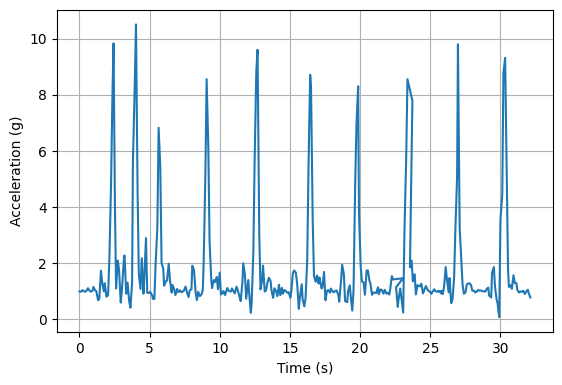

In [4]:
# Plotting the graph
fig, ax = plt.subplots()
ax.plot(time_values,acctot_values)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Acceleration (g)')
# plt.title('Y vs Time')
ax.set_aspect(aspect=2)

plt.grid(True)
plt.show()

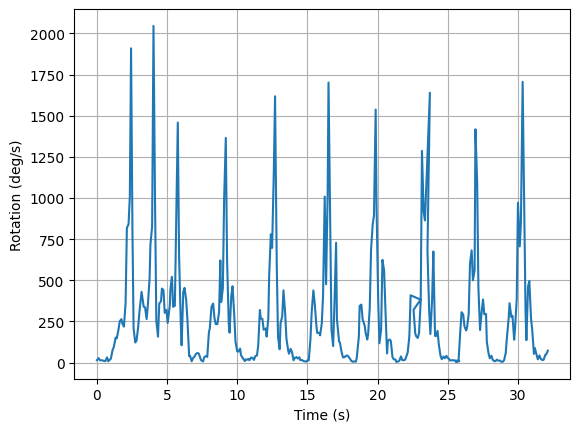

In [5]:
fig2, ax2 = plt.subplots()
ax2.plot(time_values, omgtot_values)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Rotation (deg/s)')
# plt.title('Y vs Time')
# ax2.set_aspect(aspect=2)

plt.grid(True)
plt.show()

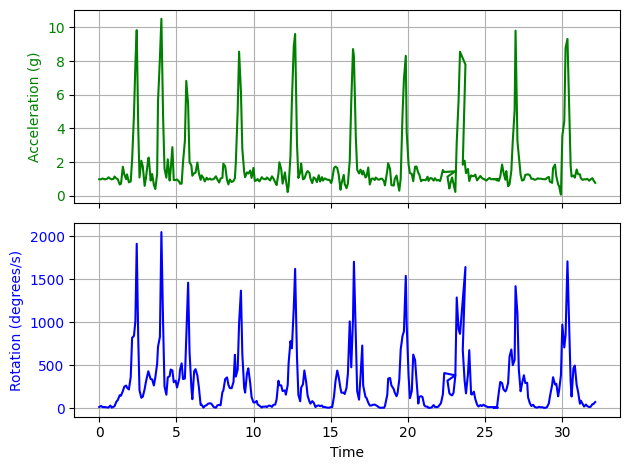

In [6]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot the first graph
ax1.plot(time_values,acctot_values, 'g-')
ax1.set_ylabel('Acceleration (g)', color='g')
ax1.tick_params(axis='y', labelcolor='g')
# ax1.set_title('Y1 vs Time')
ax1.grid(True)

# Plot the second graph
ax2.plot(time_values, omgtot_values, 'b-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Rotation (degrees/s)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
# ax2.set_title('Y2 vs Time')
ax2.grid(True)

plt.tight_layout()
plt.show()